
Made by: Andrei Kulchyk (155489) and Fiodar Piatrovich (155174)

[Github](https://github.com/aaakulchyk/put-evolutionary-computations)

# Description of a problem

We are given three columns of integers with a row for each node. The first two columns contain x and y coordinates of the node positions in a plane. The third column contains node costs. The goal is to select exactly 50% of the nodes (if the number of nodes is odd we round the number of nodes to be selected up) and form a Hamiltonian cycle (closed path) through this set of nodes such that the sum of the total length of the path plus the total cost of the selected nodes is minimized.

The distances between nodes are calculated as Euclidean distances rounded mathematically to
integer values. The distance matrix should be calculated just after reading an instance and then only
the distance matrix (no nodes coordinates) should be accessed by optimization methods to allow
instances defined only by distance matrices.

In [1]:
## Implementation

In [2]:
### Dependencies

In [3]:
from dotenv import load_dotenv

_ = load_dotenv()

In [4]:
import random
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from hamiltonian_cycle.costs import (
    dm,
)
from hamiltonian_cycle.nbconversion import convert_notebook_to_pdf
from hamiltonian_cycle.experiment import perform_experiment
from hamiltonian_cycle.algorithms.lab2 import (
    init_greedy_2regret_cycle,
    init_greedy_2regret_weighted_cycle,
)
from hamiltonian_cycle.algorithms.lab1 import (
    init_nearest_neighbor_best_position,
    init_nearest_neighbor_end,
    init_random_solution,
    init_greedy_cycle,
)

import warnings

In [5]:
plt.style.use("ggplot")

warnings.filterwarnings("ignore")

SUBSET_RATIO = 0.5
SEED: int = 369_420

random.seed(SEED)
np.random.seed(SEED)

In [6]:
### Read Data

In [7]:
def read_dataset_csv(csv_path: Path) -> pd.DataFrame:
    return pd.read_csv(csv_path, sep=";", names=["x", "y", "cost"])


DATA_DIR = Path("../data").resolve()

In [8]:
ds_a = read_dataset_csv(DATA_DIR / "TSPA.csv")
ds_b = read_dataset_csv(DATA_DIR / "TSPB.csv")

dm_a = dm(ds_a)
dm_b = dm(ds_b)

# Previous Algorithms

## Random Solution

#### Dataset A

Best solution: [139, 11, 131, 76, 23, 0, 113, 109, 53, 166, 146, 71, 1, 20, 132, 17, 153, 24, 137, 196, 52, 90, 91, 180, 102, 120, 25, 111, 5, 103, 192, 61, 51, 3, 70, 99, 49, 145, 27, 105, 43, 147, 4, 195, 143, 93, 22, 177, 40, 141, 88, 129, 152, 154, 18, 188, 33, 189, 197, 162, 148, 190, 151, 170, 104, 28, 156, 36, 19, 89, 142, 183, 130, 34, 184, 101, 140, 150, 56, 174, 127, 14, 95, 175, 57, 144, 198, 163, 79, 15, 169, 119, 123, 12, 117, 59, 60, 64, 32, 16]
Objective function statistics:
minimum = 240532
mean = 264216.105
maximum = 287515


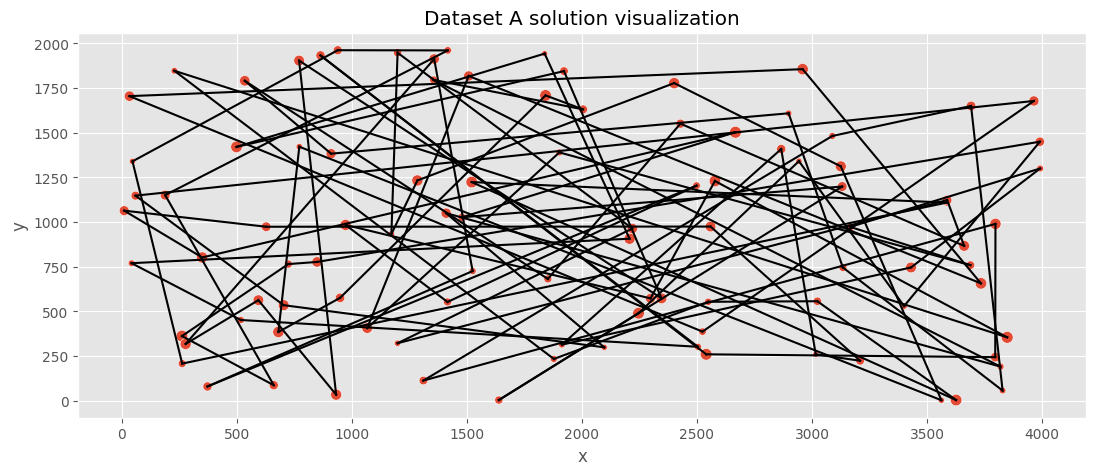

In [9]:
perform_experiment(
    ds_a,
    dm_a,
    "Dataset A solution visualization",
    init_random_solution,
)

#### Dataset B

Best solution: [82, 113, 127, 76, 150, 167, 155, 48, 136, 55, 34, 53, 188, 159, 163, 71, 114, 88, 185, 83, 106, 59, 141, 78, 174, 14, 32, 20, 149, 125, 169, 172, 151, 27, 77, 6, 197, 5, 109, 44, 142, 126, 29, 162, 86, 118, 84, 130, 194, 15, 52, 134, 41, 166, 33, 99, 154, 91, 45, 65, 190, 36, 13, 183, 173, 117, 137, 124, 66, 182, 139, 98, 0, 122, 21, 196, 152, 144, 87, 119, 73, 111, 184, 61, 195, 56, 161, 198, 11, 72, 121, 187, 171, 62, 160, 31, 175, 128, 51, 7]
Objective function statistics:
minimum = 194718
mean = 214392.56
maximum = 233546


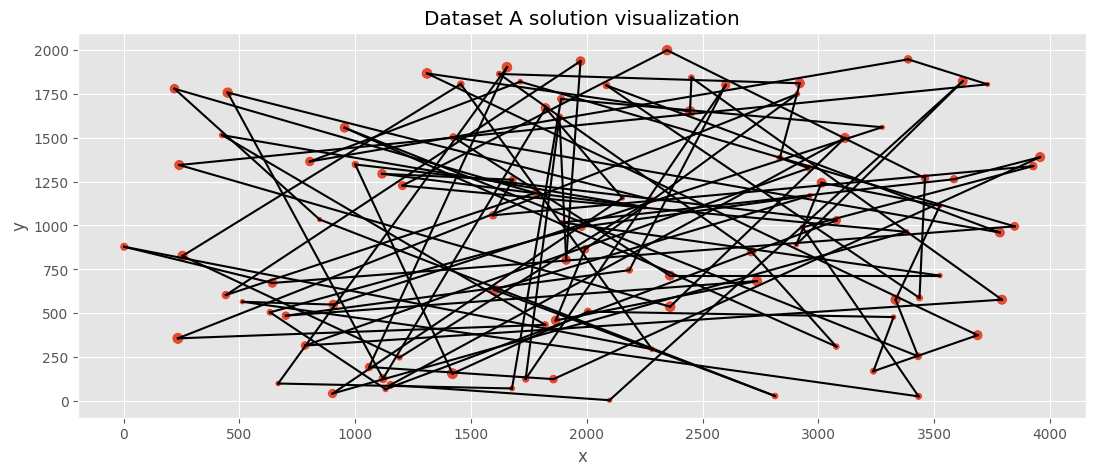

In [10]:
perform_experiment(
    ds_b,
    dm_b,
    "Dataset A solution visualization",
    init_random_solution,
)

## Nearest Neighbors Considering Adding the Node Only at the End of the Current Path

#### Dataset A

Best solution: [124, 94, 63, 53, 180, 154, 135, 123, 65, 116, 59, 115, 139, 193, 41, 42, 160, 34, 22, 18, 108, 69, 159, 181, 184, 177, 54, 30, 48, 43, 151, 176, 80, 79, 133, 162, 51, 137, 183, 143, 0, 117, 46, 68, 93, 140, 36, 163, 199, 146, 195, 103, 5, 96, 118, 149, 131, 112, 4, 84, 35, 10, 190, 127, 70, 101, 97, 1, 152, 120, 78, 145, 185, 40, 165, 90, 81, 113, 175, 171, 16, 31, 44, 92, 57, 106, 49, 144, 62, 14, 178, 52, 55, 129, 2, 75, 86, 26, 100, 121]
Objective function statistics:
minimum = 83182
mean = 85108.51
maximum = 89433


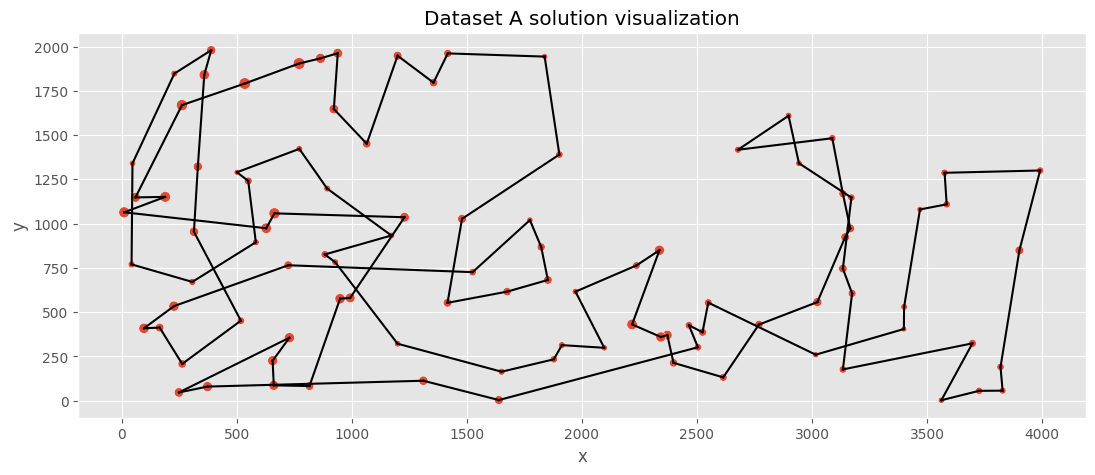

In [11]:
perform_experiment(
    ds_a,
    dm_a,
    "Dataset A solution visualization",
    init_nearest_neighbor_end,
)

#### Dataset B

Best solution: [16, 1, 117, 31, 54, 193, 190, 80, 175, 5, 177, 36, 61, 141, 77, 153, 163, 176, 113, 166, 86, 185, 179, 94, 47, 148, 20, 60, 28, 140, 183, 152, 18, 62, 124, 106, 143, 0, 29, 109, 35, 33, 138, 11, 168, 169, 188, 70, 3, 145, 15, 155, 189, 34, 55, 95, 130, 99, 22, 66, 154, 57, 172, 194, 103, 127, 89, 137, 114, 165, 187, 146, 81, 111, 8, 104, 21, 82, 144, 160, 139, 182, 25, 121, 90, 122, 135, 63, 40, 107, 100, 133, 10, 147, 6, 134, 51, 98, 118, 74]
Objective function statistics:
minimum = 52319
mean = 54390.43
maximum = 59030


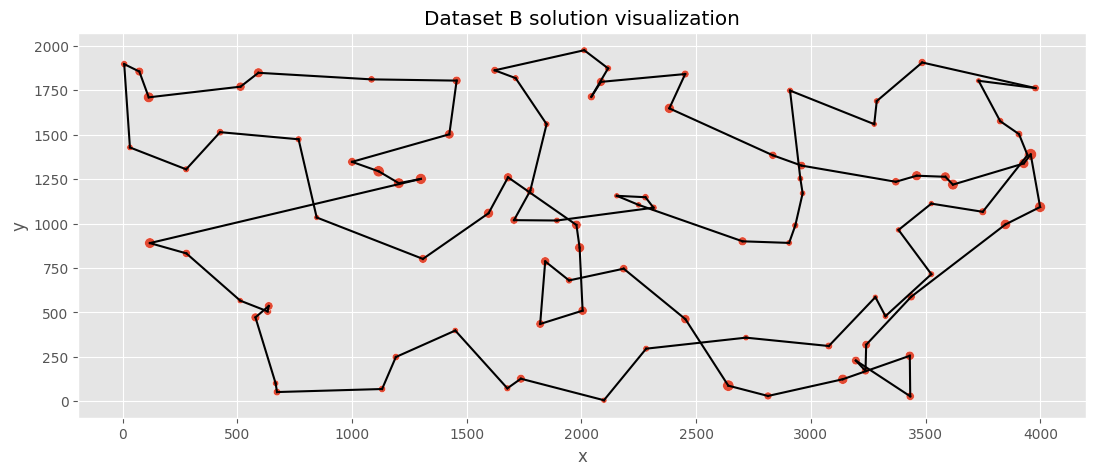

In [12]:
perform_experiment(
    ds_b,
    dm_b,
    "Dataset B solution visualization",
    init_nearest_neighbor_end,
)

## Nearest Neighbors Considering Adding the Node at the Best Position on the Current Path

#### Dataset A

Best solution: [7, 21, 14, 144, 62, 9, 102, 49, 178, 106, 52, 55, 57, 92, 129, 2, 152, 94, 124, 148, 15, 137, 23, 186, 89, 183, 143, 117, 0, 51, 176, 80, 79, 63, 180, 133, 151, 162, 59, 118, 115, 46, 68, 139, 41, 193, 159, 108, 18, 22, 146, 181, 34, 160, 54, 177, 10, 190, 184, 42, 43, 116, 65, 149, 35, 84, 4, 112, 123, 127, 70, 135, 154, 53, 86, 100, 26, 97, 1, 101, 75, 120, 44, 25, 16, 171, 175, 113, 31, 78, 145, 179, 196, 81, 185, 40, 165, 90, 27, 164]
Objective function statistics:
minimum = 71329
mean = 72180.12
maximum = 73282


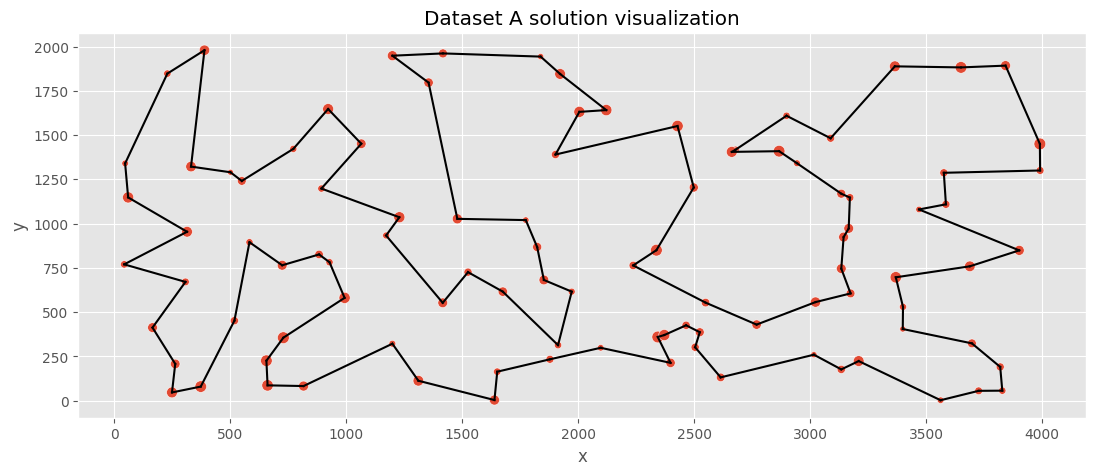

In [13]:
perform_experiment(
    ds_a,
    dm_a,
    "Dataset A solution visualization",
    init_nearest_neighbor_best_position,
)

#### Dataset B

Best solution: [4, 140, 183, 152, 170, 34, 55, 18, 62, 124, 106, 143, 35, 109, 0, 29, 168, 195, 13, 132, 169, 6, 188, 70, 3, 155, 15, 145, 139, 11, 138, 33, 160, 144, 104, 8, 111, 81, 77, 82, 21, 177, 5, 25, 121, 131, 51, 147, 90, 122, 133, 107, 40, 63, 135, 38, 27, 1, 156, 198, 54, 31, 117, 193, 73, 136, 190, 80, 175, 78, 36, 61, 91, 141, 187, 153, 163, 89, 127, 137, 114, 103, 176, 113, 194, 166, 86, 95, 130, 99, 185, 179, 66, 94, 47, 148, 60, 20, 28, 149]
Objective function statistics:
minimum = 46193
mean = 47066.485
maximum = 48330


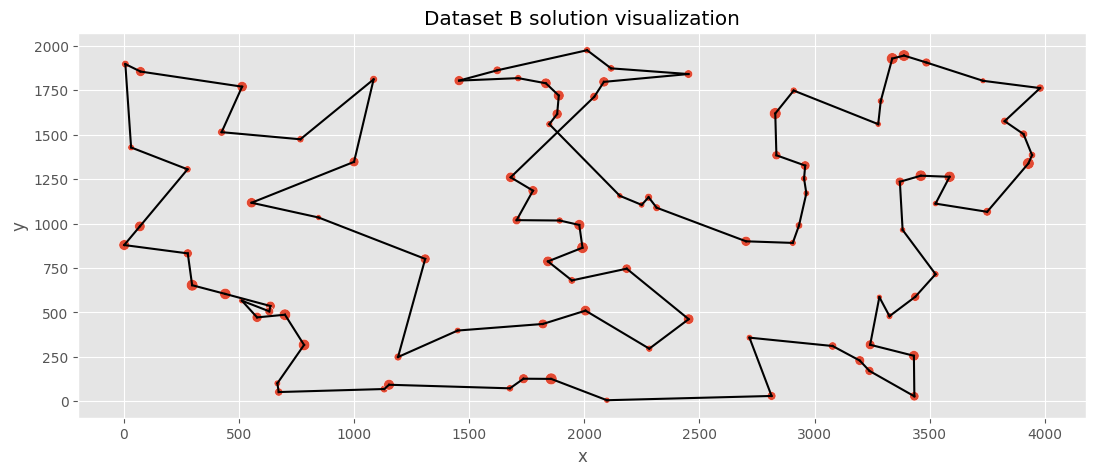

In [14]:
perform_experiment(
    ds_b,
    dm_b,
    "Dataset B solution visualization",
    init_nearest_neighbor_best_position,
)

## Greedy Cycle

#### Dataset A

Best solution: [0, 117, 143, 183, 89, 186, 23, 137, 176, 80, 79, 94, 63, 152, 97, 1, 2, 129, 92, 57, 55, 52, 49, 102, 148, 9, 62, 144, 14, 178, 106, 185, 165, 21, 7, 164, 27, 90, 40, 81, 196, 179, 145, 78, 31, 113, 175, 171, 16, 25, 44, 120, 75, 101, 86, 26, 100, 53, 180, 154, 135, 70, 127, 123, 162, 133, 151, 51, 118, 59, 149, 131, 65, 116, 43, 184, 35, 84, 112, 4, 190, 10, 177, 54, 48, 160, 34, 181, 42, 115, 41, 193, 159, 146, 22, 18, 108, 139, 68, 46]
Objective function statistics:
minimum = 71263
mean = 72071.915
maximum = 73154


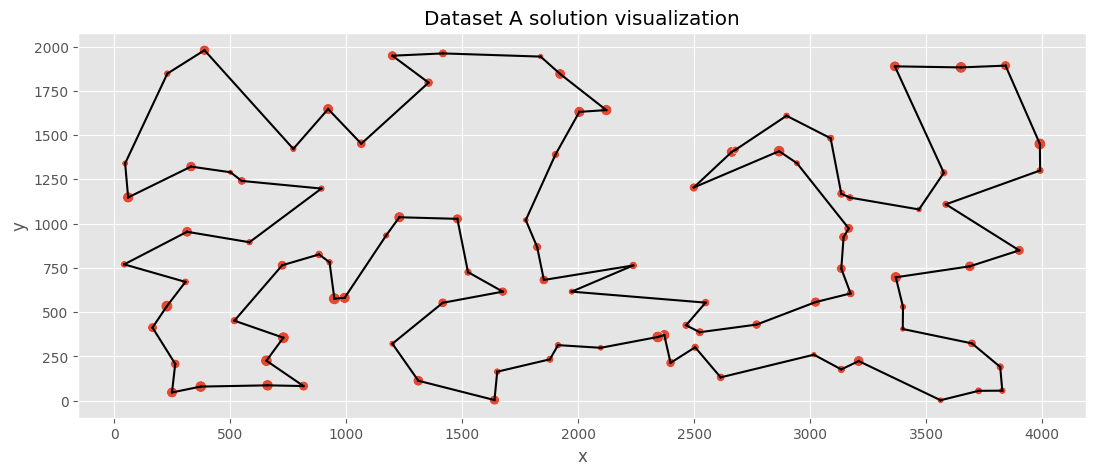

In [15]:
perform_experiment(
    ds_a,
    dm_a,
    "Dataset A solution visualization",
    init_greedy_cycle,
)

#### Dataset B

Best solution: [4, 149, 28, 20, 60, 148, 47, 94, 66, 179, 185, 99, 130, 95, 86, 166, 194, 113, 176, 103, 114, 137, 127, 89, 163, 187, 153, 81, 77, 141, 91, 61, 36, 175, 78, 45, 5, 177, 21, 82, 111, 8, 104, 138, 11, 139, 182, 25, 136, 80, 190, 73, 54, 31, 193, 117, 198, 156, 1, 121, 51, 90, 131, 135, 63, 40, 107, 122, 133, 10, 147, 6, 188, 169, 132, 70, 3, 155, 15, 145, 13, 195, 168, 33, 160, 29, 0, 109, 35, 143, 106, 124, 62, 18, 55, 34, 170, 152, 183, 140]
Objective function statistics:
minimum = 45312
mean = 46903.73
maximum = 48623


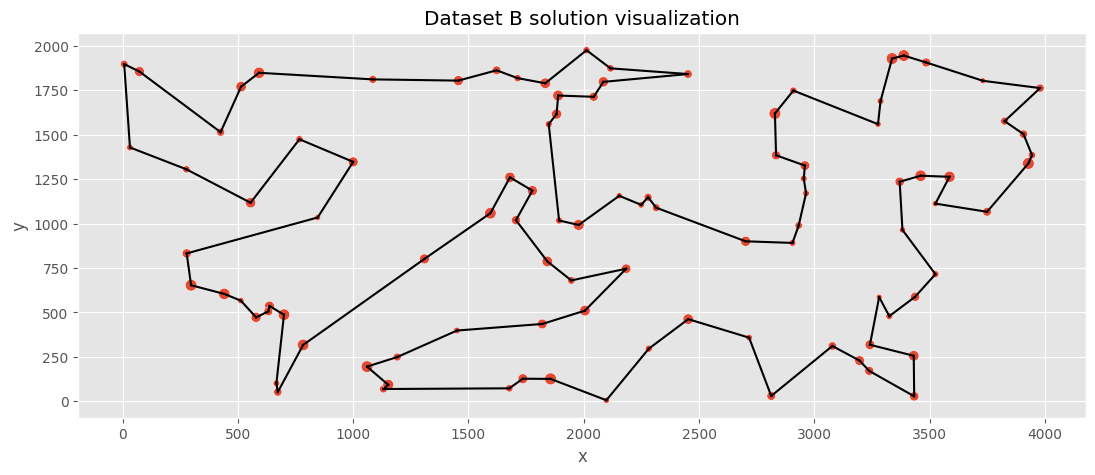

In [16]:
perform_experiment(
    ds_b,
    dm_b,
    "Dataset B solution visualization",
    init_greedy_cycle,
)

# Heuristics

## Greedy 2-regret

$$
\begin{aligned}
&\textbf{Function Greedy\_2\_regret\_heuristics}(dataset, distance\_matrix, start\_node): \\
&\quad \text{size} \gets \text{determine subset size based on dataset length and a fixed ratio} \\
&\quad \text{num\_nodes} \gets \text{total number of nodes (rows in dataset)} \\
&\quad \text{Copy the distance matrix to avoid modifying the original} \\
&\quad \text{remaining\_nodes} \gets \text{all nodes except the start\_node} \\
&\quad \text{solution} \gets [start\_node] \\
&\quad \text{nearest\_node} \gets \text{find the nearest node to start\_node based on distance matrix} \\
&\quad \text{Add nearest\_node to solution and remove it from remaining\_nodes} \\
&\quad \textbf{While the solution size is smaller than the subset size}: \\
&\quad \quad \text{best\_regret} \gets -\infty \\
&\quad \quad \text{best\_node} \gets \text{None} \\
&\quad \quad \text{best\_insertion} \gets \text{None} \\
&\quad \quad \textbf{For each node in remaining\_nodes}: \\
&\quad \quad \quad \text{best\_cost} \gets \infty \\
&\quad \quad \quad \text{second\_best\_cost} \gets \infty \\
&\quad \quad \quad \text{best\_position} \gets \text{None} \\
&\quad \quad \quad \textbf{For each position in the current solution}: \\
&\quad \quad \quad \quad \text{Calculate the cost of inserting the node between two positions in solution} \\
&\quad \quad \quad \quad \textbf{If the current cost} < \text{best\_cost}: \\
&\quad \quad \quad \quad \quad \text{second\_best\_cost} \gets \text{best\_cost} \\
&\quad \quad \quad \quad \quad \text{best\_cost} \gets \text{current\_cost} \\
&\quad \quad \quad \quad \quad \text{best\_position} \gets \text{current insertion point} \\
&\quad \quad \quad \quad \textbf{Else If the current cost} < \text{second\_best\_cost}: \\
&\quad \quad \quad \quad \quad \text{second\_best\_cost} \gets \text{current\_cost} \\
&\quad \quad \quad \text{Calculate the regret} \gets \text{second\_best\_cost} - \text{best\_cost} \\
&\quad \quad \quad \textbf{If the regret} > \text{best\_regret}: \\
&\quad \quad \quad \quad \text{best\_regret} \gets \text{regret} \\
&\quad \quad \quad \quad \text{best\_node} \gets \text{current node} \\
&\quad \quad \quad \quad \text{best\_insertion} \gets \text{current insertion point} \\
&\quad \quad \text{Insert best\_node into the solution after best\_insertion point} \\
&\quad \quad \text{Remove best\_node from remaining\_nodes} \\
&\quad \textbf{Return} \text{the final solution based on dataset order}
\end{aligned}
$$


#### Dataset A

Best solution: [196, 157, 188, 113, 171, 16, 78, 25, 44, 120, 82, 129, 92, 57, 172, 2, 75, 86, 26, 121, 182, 53, 158, 154, 6, 135, 194, 127, 123, 24, 156, 4, 190, 177, 104, 54, 48, 34, 192, 181, 146, 22, 20, 134, 18, 69, 67, 140, 68, 110, 142, 41, 96, 42, 43, 77, 65, 197, 115, 198, 46, 60, 118, 109, 151, 133, 79, 80, 176, 66, 141, 0, 153, 183, 89, 23, 186, 114, 15, 148, 9, 61, 73, 132, 21, 14, 49, 178, 52, 185, 119, 165, 39, 95, 7, 164, 71, 27, 90, 81]
Objective function statistics:
minimum = 105692
mean = 115579.335
maximum = 126951


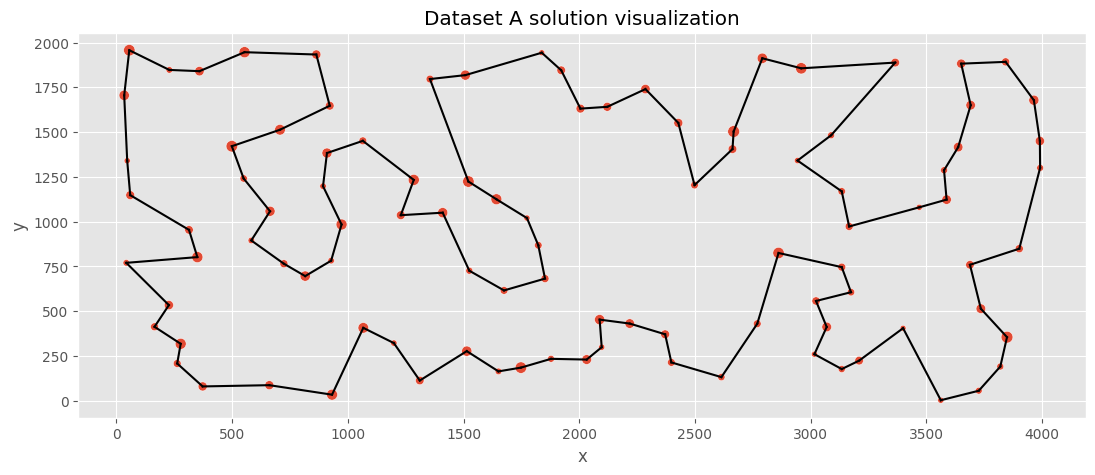

In [17]:
perform_experiment(
    ds_a, dm_a, "Dataset A solution visualization", init_greedy_2regret_cycle
)

#### Dataset B

Best solution: [18, 34, 174, 183, 9, 99, 185, 179, 172, 57, 66, 47, 60, 20, 59, 28, 4, 53, 170, 184, 155, 84, 70, 132, 169, 188, 6, 192, 134, 2, 74, 118, 98, 51, 120, 71, 178, 10, 44, 17, 107, 100, 63, 102, 135, 131, 121, 112, 19, 173, 31, 117, 198, 24, 1, 27, 42, 196, 108, 80, 162, 142, 5, 123, 7, 36, 79, 91, 141, 97, 77, 58, 82, 68, 104, 33, 49, 29, 0, 41, 143, 119, 153, 186, 163, 103, 127, 137, 75, 93, 48, 166, 194, 180, 64, 86, 110, 128, 124, 62]
Objective function statistics:
minimum = 67809
mean = 72740.005
maximum = 78406


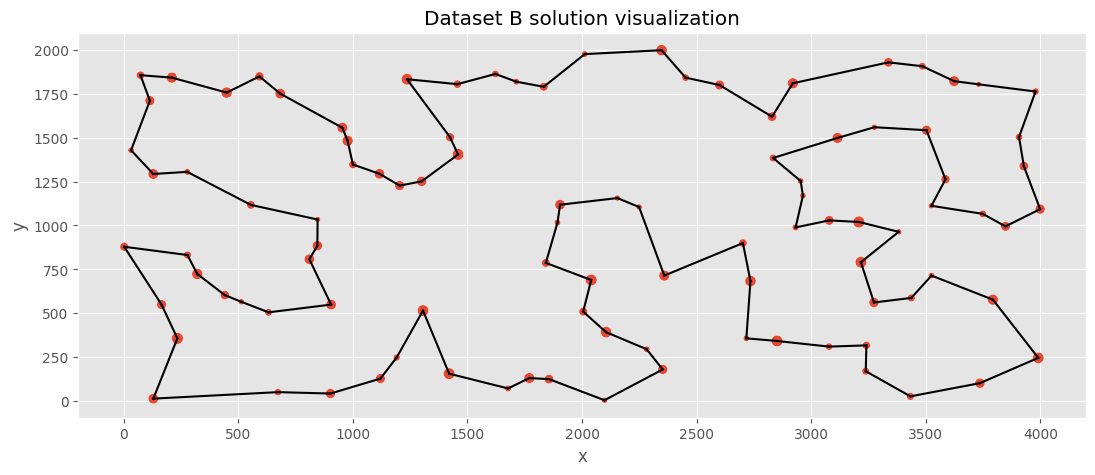

In [18]:
perform_experiment(
    ds_b, dm_b, "Dataset B solution visualization", init_greedy_2regret_cycle
)

## Greedy heuristics with a weighted sum criterion

$$
\begin{aligned}
&\textbf{Function Greedy\_heuristics\_with\_weighted\_sum}(dataset, distance\_matrix, start\_node, w\_cost, w\_regret): \\
&\quad \text{size} \gets \text{determine subset size as half of the dataset length} \\
&\quad \text{num\_nodes} \gets \text{total number of nodes (rows in dataset)} \\
&\quad \text{Copy the distance matrix to avoid modifying the original} \\
&\quad \text{remaining\_nodes} \gets \text{all nodes except the start\_node} \\
&\quad \text{solution} \gets [start\_node] \\
&\quad \text{nearest\_node} \gets \text{find the nearest node to start\_node based on distance matrix} \\
&\quad \text{Add nearest\_node to solution and remove it from remaining\_nodes} \\
&\quad \textbf{While the solution size is smaller than the subset size}: \\
&\quad \quad \text{best\_combined\_criterion} \gets \infty \\
&\quad \quad \text{best\_node} \gets \text{None} \\
&\quad \quad \text{best\_insertion} \gets \text{None} \\
&\quad \quad \textbf{For each node in remaining\_nodes}: \\
&\quad \quad \quad \text{best\_cost} \gets \infty \\
&\quad \quad \quad \text{second\_best\_cost} \gets \infty \\
&\quad \quad \quad \text{best\_position} \gets \text{None} \\
&\quad \quad \quad \textbf{For each position in the current solution}: \\
&\quad \quad \quad \quad \text{Calculate the cost of inserting the node between two positions in solution} \\
&\quad \quad \quad \quad \textbf{If the current cost} < \text{best\_cost}: \\
&\quad \quad \quad \quad \quad \text{second\_best\_cost} \gets \text{best\_cost} \\
&\quad \quad \quad \quad \quad \text{best\_cost} \gets \text{current\_cost} \\
&\quad \quad \quad \quad \quad \text{best\_position} \gets \text{current insertion point} \\
&\quad \quad \quad \quad \textbf{Else If the current cost} < \text{second\_best\_cost}: \\
&\quad \quad \quad \quad \quad \text{second\_best\_cost} \gets \text{current\_cost} \\
&\quad \quad \quad \text{Calculate the regret} \gets \text{second\_best\_cost} - \text{best\_cost} \\
&\quad \quad \quad \text{combined\_criterion} \gets \text{w\_cost} \times \text{best\_cost} + \text{w\_regret} \times \text{regret} \\
&\quad \quad \textbf{If combined\_criterion} < \text{best\_combined\_criterion}: \\
&\quad \quad \quad \text{best\_combined\_criterion} \gets \text{combined\_criterion} \\
&\quad \quad \quad \text{best\_node} \gets \text{current node} \\
&\quad \quad \quad \text{best\_insertion} \gets \text{current insertion point} \\
&\quad \quad \text{Insert best\_node into the solution after best\_insertion point} \\
&\quad \quad \text{Remove best\_node from remaining\_nodes} \\
&\quad \textbf{Return} \text{the final solution based on dataset order}
\end{aligned}
$$


#### Dataset A

Best solution: [114, 15, 62, 9, 148, 124, 94, 152, 97, 1, 2, 129, 92, 57, 55, 52, 49, 102, 144, 14, 178, 106, 185, 165, 90, 119, 40, 81, 196, 179, 145, 78, 31, 113, 175, 171, 16, 25, 44, 120, 75, 101, 86, 26, 100, 53, 154, 135, 70, 127, 123, 149, 131, 65, 116, 43, 42, 184, 84, 112, 4, 190, 10, 177, 54, 48, 160, 34, 181, 146, 22, 18, 108, 69, 159, 41, 193, 139, 68, 46, 115, 59, 118, 51, 162, 151, 133, 180, 63, 79, 80, 176, 137, 0, 117, 143, 183, 89, 23, 186]
Objective function statistics:
minimum = 71040
mean = 71923.37
maximum = 73212


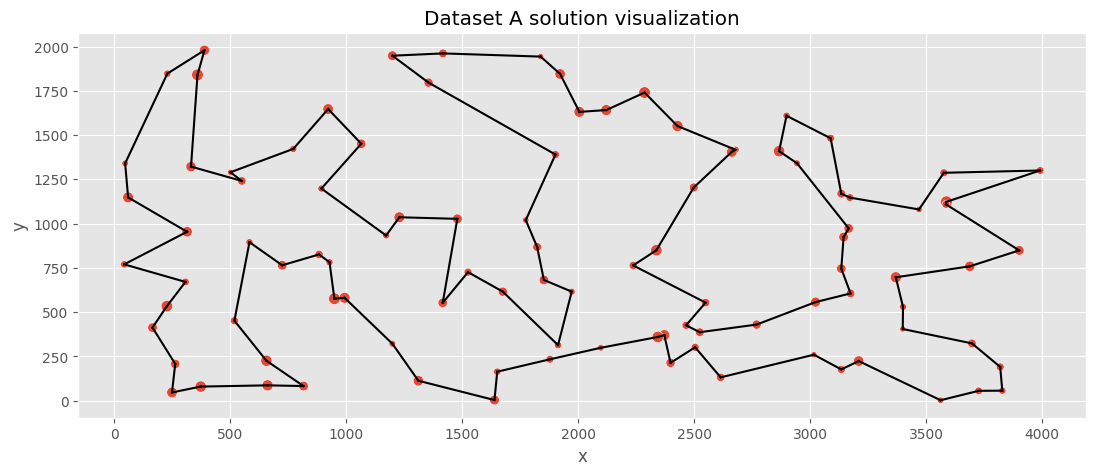

In [19]:
perform_experiment(
    ds_a,
    dm_a,
    "Dataset A solution visualization",
    init_greedy_2regret_weighted_cycle,
    w_regret=0.5,
    w_cost=0.5,
)

#### Dataset B

Best solution: [189, 109, 35, 0, 29, 111, 81, 77, 141, 36, 61, 175, 78, 80, 190, 193, 198, 117, 54, 31, 73, 136, 45, 5, 177, 21, 82, 8, 104, 144, 160, 33, 138, 182, 11, 139, 195, 168, 51, 121, 131, 1, 27, 38, 135, 63, 40, 107, 10, 133, 122, 90, 147, 6, 188, 169, 132, 13, 145, 15, 3, 70, 155, 170, 152, 140, 28, 20, 60, 148, 47, 94, 66, 99, 183, 95, 130, 185, 179, 86, 166, 194, 113, 176, 103, 114, 137, 127, 89, 163, 165, 187, 153, 143, 106, 124, 62, 18, 55, 34]
Objective function statistics:
minimum = 47175
mean = 48464.815
maximum = 49946


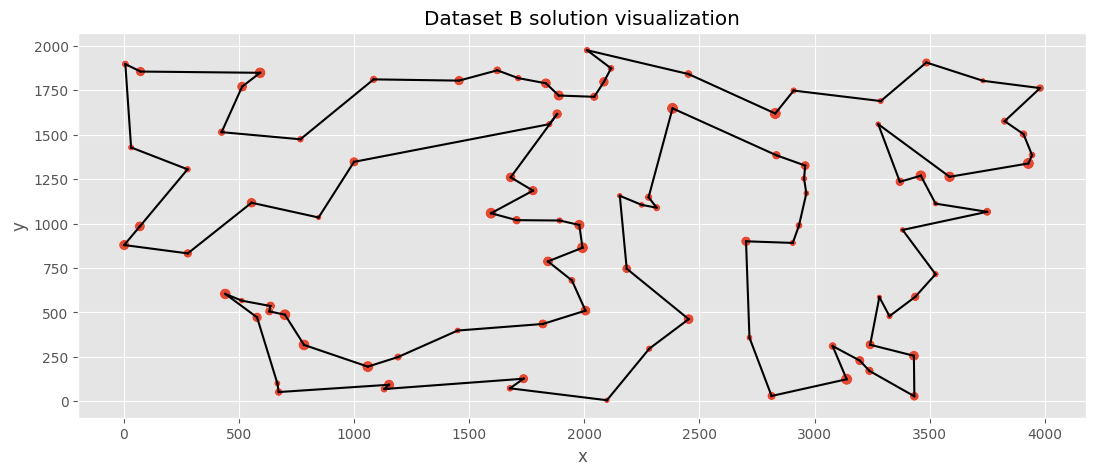

In [20]:
perform_experiment(
    ds_b,
    dm_b,
    "Dataset B solution visualization",
    init_greedy_2regret_weighted_cycle,
    w_regret=0.5,
    w_cost=0.5,
)

# Conclusion

While Pure Greedy 2-regret heuristics application lead to worse cost score on both Datasets, its weighted version lead to a slight improvement on average on Dataset A: 72071.915 vs 71923.37 (greedy cycle vs greedy cycle with heuristics), and worse results on Dataset B: 46903.73 vs 48464.815 (greedy cycle vs greedy cycle with heuristics)